In [13]:
import scipy.stats as sps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Работа с библиотекой `scipy.stats`.

<b>Общий принцип:</b>

Пусть $X$ — класс, реализующий некоторое распределение. Конкретное распределение с параметрами `params` можно получить как **`X(params)`**. У него доступны следующие методы:


* `X(params).rvs(size=N)` — генерация выборки размера $N$ (<b>R</b>andom <b>V</b>ariate<b>S</b>). Возвращает `numpy.array`;
* `X(params).cdf(x)` — значение функции распределения в точке $x$ (<b>C</b>umulative <b>D</b>istribution <b>F</b>unction);
* `X(params).logcdf(x)` — значение логарифма функции распределения в точке $x$;
* `X(params).ppf(q)` — $q$-квантиль (<b>P</b>ercent <b>P</b>oint <b>F</b>unction);
* `X(params).mean()` — математическое ожидание;
* `X(params).median()` — медиана ($1/2$-квантиль);
* `X(params).var()` — дисперсия (<b>Var</b>iance);
* `X(params).std()` — стандартное отклонение = корень из дисперсии (<b>St</b>andard <b>D</b>eviation).

Кроме того для непрерывных распределений определены функции
* `X(params).pdf(x)` — значение плотности в точке $x$ (<b>P</b>robability <b>D</b>ensity <b>F</b>unction);
* `X(params).logpdf(x)` — значение логарифма плотности в точке $x$.

А для дискретных
* `X(params).pmf(k)` — значение дискретной плотности в точке $k$ (<b>P</b>robability <b>M</b>ass <b>F</b>unction);
* `X(params).logpdf(k)` — значение логарифма дискретной плотности в точке $k$.

Все перечисленные выше методы применимы как к конкретному распределению `X(params)`, так и к самому классу `X`. Во втором случае параметры передаются в сам метод. Например, вызов `X.rvs(size=N, params)` эквивалентен `X(params).rvs(size=N)`. При работе с распределениями и случайными величинами рекомендуем использовать первый способ, посколько он больше согласуется с математическим синтаксисом теории вероятностей.

Параметры могут быть следующими:
* `loc` — параметр сдвига;
* `scale` — параметр масштаба;
* и другие параметры (например, $n$ и $p$ для биномиального).

---

Для примера сгенерируем выборку размера $N = 200$ из распределения $\mathcal{N}(1, 9)$ и посчитаем некоторые статистики.
В терминах выше описанных функций у нас $X$ = `sps.norm`, а `params` = (`loc=1, scale=3`).

*Примечание.* Выборка — набор независимых одинаково распределенных случайных величин. Часто в разговорной речи выборку отождествляют с ее *реализацией* — значения случайных величин из выборки при "выпавшем" элементарном исходе.

In [9]:
sample = sps.norm(loc=1, scale=3).rvs(size=200)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [ 2.71517396  0.58609157 -3.0316336   0.42770781 -2.38450718  0.66443887
 -0.81075696  1.48970548  0.42004623  1.34071225]
Выборочное среденее: 0.142
Выборочная дисперсия: 2.787


Вероятностные характеристики

In [ ]:
print('Плотность:\t\t', sps.norm(loc=1, scale=3).pdf([-1, 0, 1, 2, 3]))
print('Функция распределения:\t', sps.norm(loc=1, scale=3).cdf([-1, 0, 1, 2, 3]))

$p$-квантиль распределения с функцией распределения $F$ — это число $min\{x: F(x) \geqslant p\}$.

In [ ]:
print('Квантили:', sps.norm(loc=1, scale=3).ppf([0.05, 0.1, 0.5, 0.9, 0.95]))

Cгенерируем выборку размера $N = 200$ из распределения $Bin(10, 0.6)$ и посчитаем некоторые статистики.
В терминах выше описанных функций у нас $X$ = `sps.binom`, а `params` = (`n=10, p=0.6`).

In [ ]:
sample = sps.binom(n=10, p=0.6).rvs(size=200)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

In [ ]:
print('Дискретная плотность:\t', sps.binom(n=10, p=0.6).pmf([-1, 0, 5, 5.5, 10]))
print('Функция распределения:\t', sps.binom(n=10, p=0.6).cdf([-1, 0, 5, 5.5, 10]))

In [ ]:
print('Квантили:', sps.binom(n=10, p=0.6).ppf([0.05, 0.1, 0.5, 0.9, 0.95]))

Бывает так, что <b>надо сгенерировать выборку из распределения, которого нет в `scipy.stats`</b>.
Для этого надо создать класс, который будет наследоваться от класса `rv_continuous` для непрерывных случайных величин и от класса `rv_discrete` для дискретных случайных величин.
<a  target="_blank" href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous">Пример из документации.</a>

Для примера сгенерируем выборку из распределения с плотностью $f(x) = \frac{4}{15} x^3 I\{x \in [1, 2] = [a, b]\}$.

In [ ]:
class cubic_gen(sps.rv_continuous):
    def _pdf(self, x):
        return 4 * x ** 3 / 15
cubic = cubic_gen(a=1, b=2, name='cubic')

sample = cubic.rvs(size=200)

print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Если дискретная случайная величина может принимать небольшое число значений, то можно не создавать новый класс, как показано выше, а явно указать эти значения и из вероятности.

In [ ]:
some_distribution = sps.rv_discrete(
    name='some_distribution', 
    values=([1, 2, 3], [0.6, 0.1, 0.3])  # значения и вероятности
)

sample = some_distribution.rvs(size=200)

print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Частота значений по выборке:', 
      (sample == 1).mean(), (sample == 2).mean(), (sample == 3).mean())

**Задача 1.** Сгенерировать выборку размера 10 из распределения $\mathcal{N}(a, s)$. Для данной выборки подсчитайте выборочные зарактеристики. Постройте гистограмму, эмпирическую функцию распределения.



Первые 10 значений выборки:
 [ 214.97902186  -65.26573012   87.96445639   61.76294407   19.84686944
   90.3412171  -133.52488303   62.07874291  -18.12412093    5.83440826]
Выборочное среденее: 32.589
Выборочная дисперсия: 8200.800
Плотность:	 [0.00396536 0.00396953 0.0039733  0.00397668 0.00397966]
Функция распределения:	 [0.45620469 0.46017216 0.46414361 0.46811863 0.47209683]
Квантилии [-154.4853627  -118.15515655   10.          138.15515655  174.4853627 ]


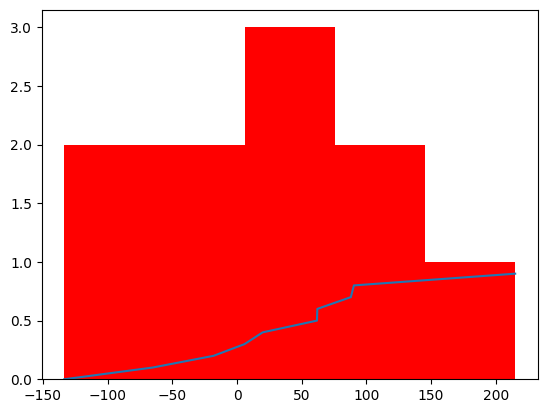

In [27]:
a=10
s=100

sample = sps.norm(loc=a, scale=s).rvs(size=10)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

print('Плотность:\t', sps.norm(loc=a, scale=s).pdf([-1,0,1,2,3]))
print('Функция распределения:\t', sps.norm(loc=a, scale=s).cdf([-1,0,1,2,3]))
print('Квантилии', sps.norm(loc=a, scale=s).ppf([0.05,0.1,0.5,0.9,0.95]))

gistorgam = plt.hist(sample, bins = 'auto', color = 'red', alpha=1)
plt.plot(np.sort(sample), np.linspace(0, 1, len(sample), endpoint=False))


**Задача 2.** Скачайте <a href="https://www.kaggle.com/spscientist/students-performance-in-exams
">датасет</a> с данными о результатах учащихся на экзаменах.

Данный датасет состоит из таблицы баллов учащихся на экзаменах по математике, чтению и письму, а также дополнительной информации о студентах. Каждая строка соответствует одному учащемуся, каждый столбец соответствует одному признаку. В столбцах math score, reading score и writing score записаны баллы за экзамены.

Для исследования возьмите столбцы 'math score', 'reading score', 'writing score'.

----

Чтобы скачать данные, зарегистрируйтесь на сайте, после нажмите download на странице датасета и распакуйте скачанный архив. Вы получите файл формата `csv`.

Если вы работаете в Google Colab, можно загрузить полученный файл в разделе "Файлы" (значок папки) на левой панели.

In [37]:
df = pd.read_csv("./StudentsPerformance.csv")
df.head()


columns = ['math score','reading score','writing score']
df_chosen_columns=df[columns]
df_chosen_columns


,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


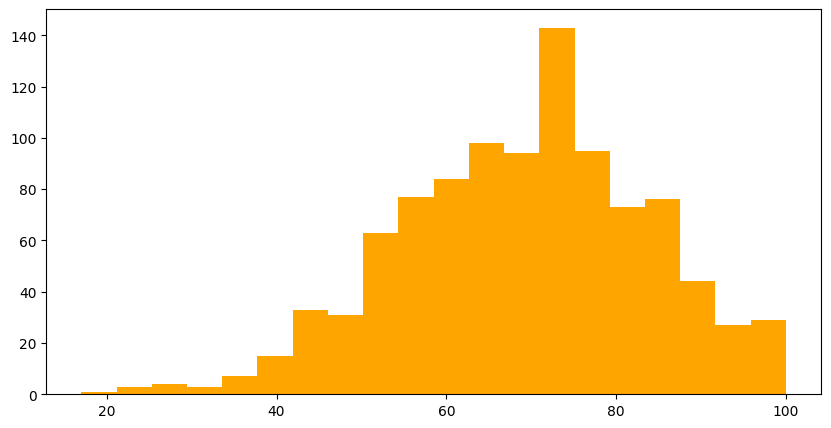

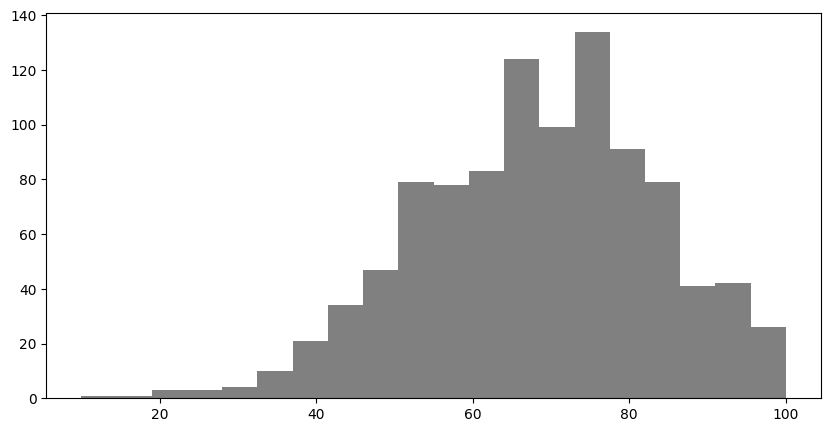

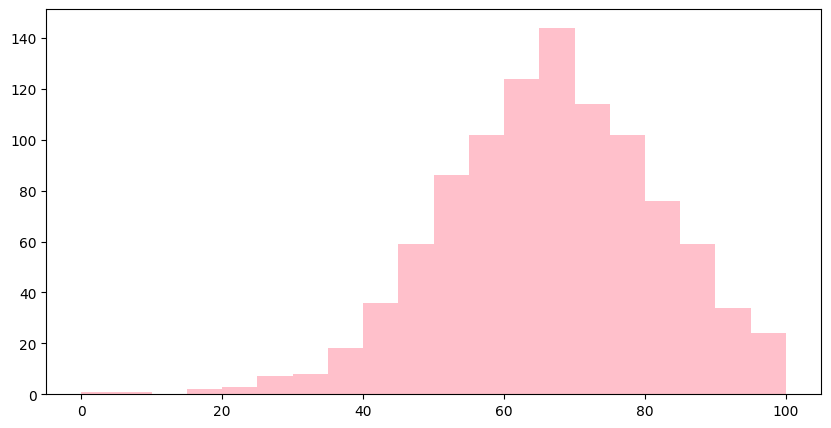

In [54]:
plt.figure(figsize=(10,5))
plt.hist(df_chosen_columns['reading score'],bins=20, color='orange', alpha=1)
reading_score_Q1 = df_chosen_columns['reading score'].quantile(0.25)
reading_score_Q3 = df_chosen_columns['reading score'].quantile(0.75)
reading_score_IQR = reading_score_Q3-reading_score_Q1

plt.figure(figsize=(10,5))
plt.hist(df_chosen_columns['writing score'],bins=20, color='grey', alpha=1)
writing_score_Q1 = df_chosen_columns['writing score'].quantile(0.25)
writing_score_Q3 = df_chosen_columns['writing score'].quantile(0.75)
writing_score_IQR = writing_score_Q3-writing_score_Q1

plt.figure(figsize=(10,5))
plt.hist(df_chosen_columns['math score'],bins=20, color='pink', alpha=1)
math_score_Q1 = df_chosen_columns['math score'].quantile(0.25)
math_score_Q3 = df_chosen_columns['math score'].quantile(0.75)
math_score_IQR = math_score_Q3-math_score_Q1

In [28]:
# эта функция читает данные, в кавычках укажите путь к файлу на вашем компьютере или в Colab
df = pd.read_csv("./StudentsPerformance.csv")

In [ ]:
#Посмотрите на первые строки этой таблицы.
df.head()

In [ ]:
#Выберите несколько (3-6) столбцов для анализа значений в них.
# укажите столбцы данных 
# Пример: columns = ['math score', ...]
columns = [...]

df_chosen_columns = df[columns]

#Одномерный массив значений одного признака (например, 'math score') можно получить так:
#df_chosen_columns['math score']

#### Гистограммы

Для каждого из выбранных признаков нарисуйте гистограмму распределения. Для этого воспользуйтесь функцией `matplotlib.pyplot.hist`.

Предположите, для каких признаков возможно наличие выбросов. Эту проблему можно решить с помощью параметра range, который определяет, в каких границах строится гистограмма.

In [ ]:
plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4));

В словаре ranges_without_outliers укажите, в каких пределах, по вашему мнению, стоит нарисовать гистограмму распределения для каждого признака.

In [49]:
# range = [(Q1 - 1.5*IQR), (Q3 + 1.5*IQR)]
ranges_without_outliers = {
    'math score' : ((math_score_Q1 - 1.5*math_score_IQR), (math_score_Q3 + 1.5*math_score_IQR)),
    'reading score' : ((reading_score_Q1 - 1.5*reading_score_IQR), (reading_score_Q3 + 1.5*reading_score_IQR)),
    'writing score' : ((writing_score_Q1 - 1.5*writing_score_IQR), (writing_score_Q3 + 1.5*writing_score_IQR))
}

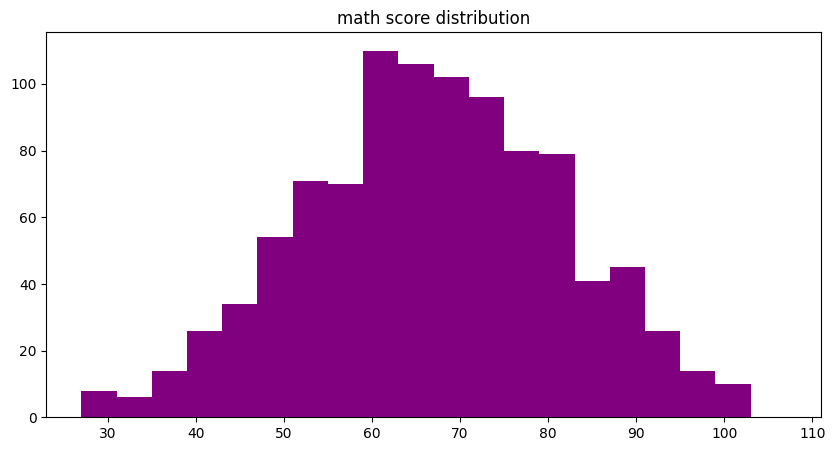

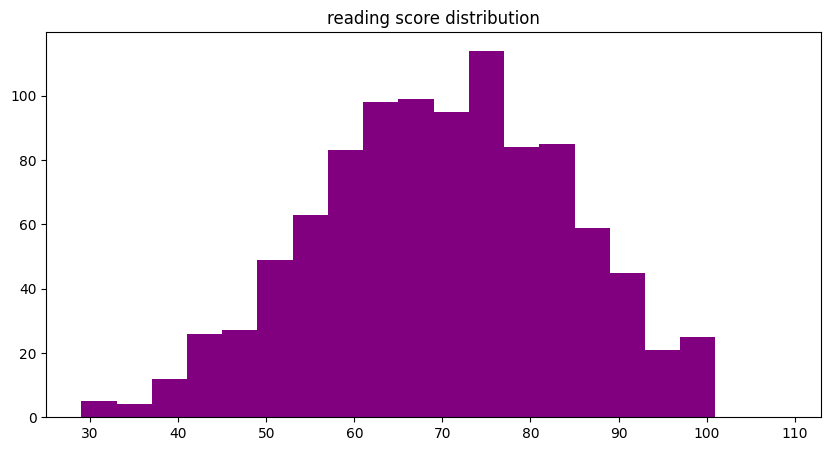

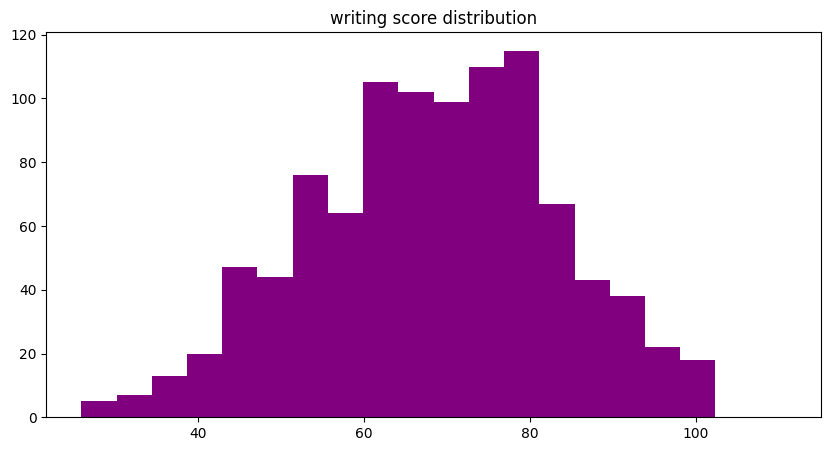

In [57]:
#Аналогично определите интервалы для исследуемых признаков
for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(10, 5))
    plt.hist(df_chosen_columns[column], range=column_range, bins=20, color='purple')
    plt.title(column + ' distribution')

Сделайте выводы

Изменилась ли форма распределений, стали ли графики информативнее?